In [0]:
%pip install seaborn

In [0]:
%tensorflow_version 2.x

In [0]:
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras as K
from tensorflow.keras import layers

tf.__version__  

'2.2.0-rc1'

In [0]:
train_dataset = pd.read_excel('Data_Train.xlsx', sheet_name='Sheet1')

In [0]:
train_dataset = pd.read_excel('Data_Test.xlsx', sheet_name='Sheet1') # test dataset

In [0]:
train_dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [0]:
train_dataset = train_dataset.dropna()
train_dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
30,Toyota Etios Cross 1.4L VD,Chennai,2014,70000,Diesel,Manual,Second,23.59 kmpl,1364 CC,67.06 bhp,5.0,9.27 Lakh
36,Skoda Rapid 1.6 MPI AT Style,Mumbai,2017,13500,Petrol,Automatic,First,14.84 kmpl,1598 CC,103.52 bhp,5.0,14.95 Lakh
39,BMW 5 Series 520d Luxury Line,Mumbai,2012,66889,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0,70.43 Lakh
43,Skoda Rapid 1.6 MPI Ambition,Jaipur,2018,4000,Petrol,Manual,First,15.41 kmpl,1598 CC,103.52 bhp,5.0,11.89 Lakh


In [0]:
def getPrice(x):
    p, d = x.split(" ")
    return float(p) * (100 if d == 'Cr' else 1)


train_dataset.Name = train_dataset.Name.astype(str).str.split(" ").str[0]
train_dataset.Mileage = train_dataset.Mileage.str.split(" ").str[0].astype(np.float)
train_dataset.Engine = train_dataset.Engine.str.split(" ").str[0].astype(np.int64)
train_dataset.Power = train_dataset.Power.str.split(" ").str[0].astype(np.float)
train_dataset.Seats = train_dataset.Seats.astype(np.int64)
#train_dataset.Price = train_dataset.Price.astype(np.float)
train_dataset.New_Price = train_dataset.New_Price.apply(getPrice)

train_dataset.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
2,Toyota,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.80,7,25.27
30,Toyota,Chennai,2014,70000,Diesel,Manual,Second,23.59,1364,67.06,5,9.27
36,Skoda,Mumbai,2017,13500,Petrol,Automatic,First,14.84,1598,103.52,5,14.95
39,BMW,Mumbai,2012,66889,Diesel,Automatic,First,22.48,1995,190.00,5,70.43
43,Skoda,Jaipur,2018,4000,Petrol,Manual,First,15.41,1598,103.52,5,11.89


In [0]:
train_dataset.pop("Name")
train_dataset.pop("Location")

train_data = train_dataset.sample(frac=0.8,random_state=0)
test_data = train_dataset.drop(train_data.index)

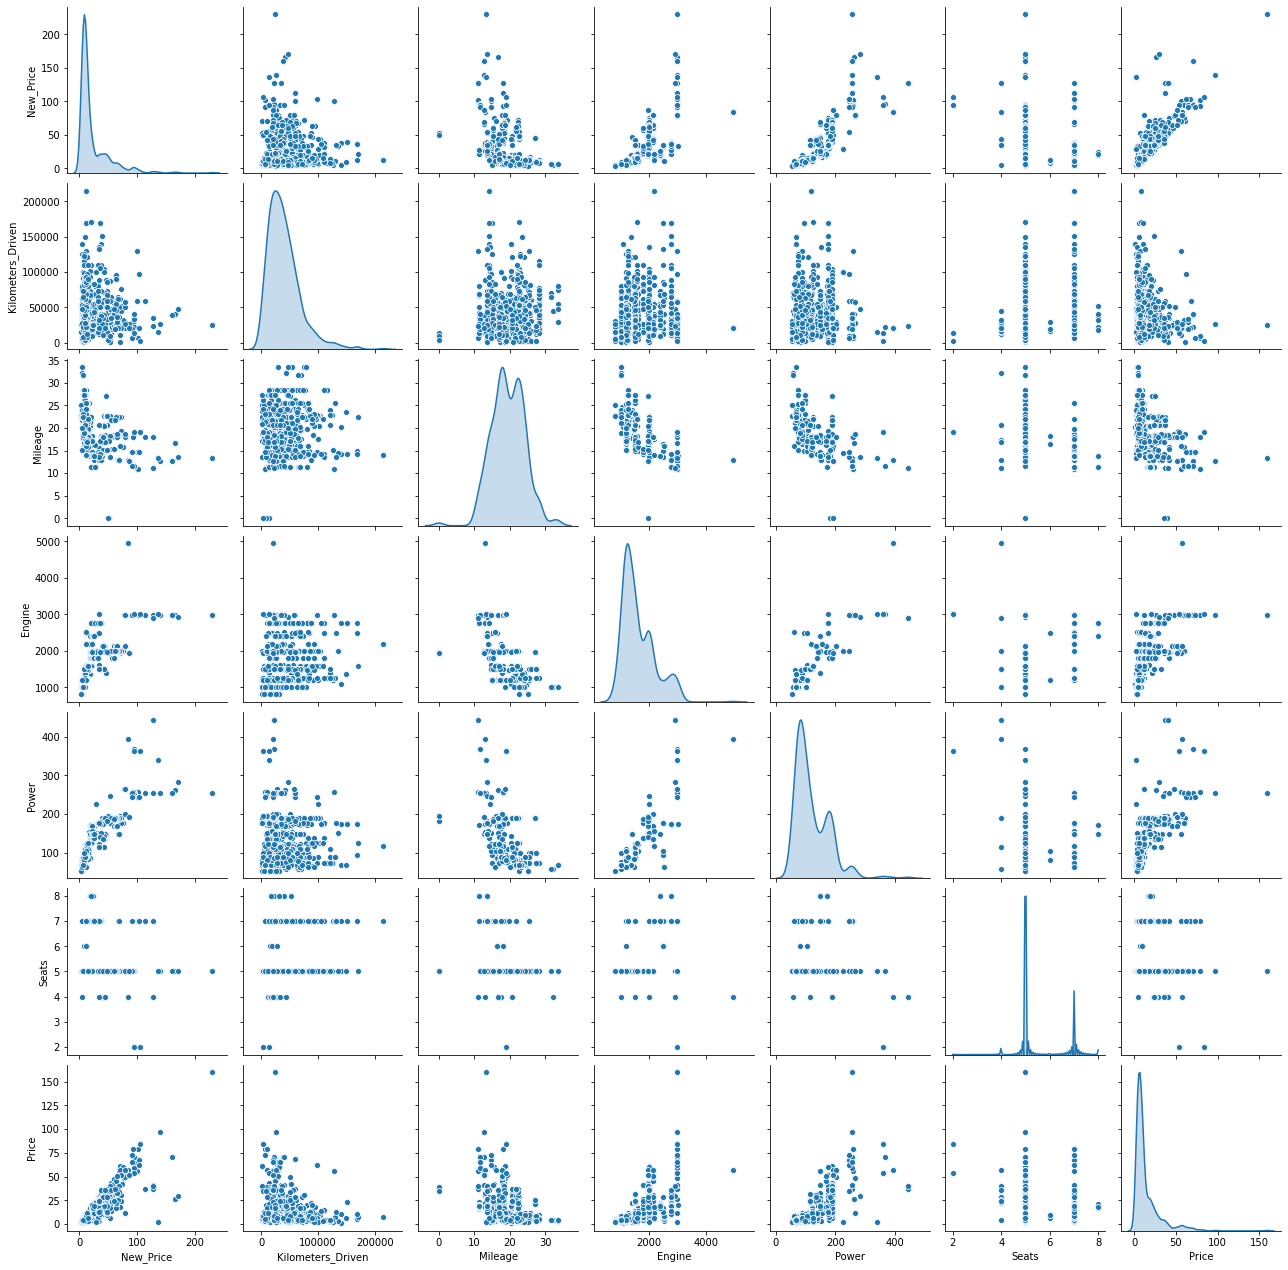

In [0]:
sns.pairplot(train_data[["New_Price", "Kilometers_Driven", "Fuel_Type", "Transmission", "Owner_Type", "Mileage", "Engine", "Power", "Seats", "Price"]], diag_kind="kde")

In [0]:
train_label = train_data.pop("New_Price")
test_label = test_data.pop("New_Price")
train_prices = train_data.pop("Price")
test_prices = test_data.pop("Price")

In [0]:
unique_label = (('Transmission', train_data.Transmission.unique()), ('Fuel_Type', train_data.Fuel_Type.unique()), ('Owner_Type', train_data.Owner_Type.unique()))

for x in unique_label:
    c, d = x
    c1, c2 = train_data[c], test_data[c]

    for i in d:
        train_data[c + "_" + i] = (c1 == i) * 1
        test_data[c + "_" + i] = (c2 == i) * 1
    
    train_data.pop(c), test_data.pop(c)

train_data

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_Manual,Transmission_Automatic,Fuel_Type_Petrol,Fuel_Type_Diesel,Fuel_Type_CNG,Owner_Type_First,Owner_Type_Second
676,2014,43814,18.50,1198,86.80,5,1,0,1,0,0,1,0
147,2012,64692,22.50,998,67.04,5,1,0,1,0,0,1,0
260,2018,14730,13.50,1999,246.74,5,0,1,1,0,0,1,0
691,2011,38000,18.50,1198,86.80,5,1,0,1,0,0,1,0
1217,2018,23955,18.60,1197,81.86,5,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2014,51200,15.10,1196,73.00,5,1,0,1,0,0,1,0
960,2015,72253,15.96,2523,62.10,7,1,0,0,1,0,1,0
869,2016,60249,18.25,1968,187.74,5,0,1,0,1,0,1,0
263,2012,53226,20.64,1498,108.50,5,1,0,0,1,0,0,1


In [0]:
train_data['Owner_Type_Third'] = 0
train_data

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Transmission_Manual,Transmission_Automatic,Fuel_Type_Petrol,Fuel_Type_Diesel,Fuel_Type_CNG,Owner_Type_First,Owner_Type_Second,Owner_Type_Third
676,2014,43814,18.50,1198,86.80,5,1,0,1,0,0,1,0,0
147,2012,64692,22.50,998,67.04,5,1,0,1,0,0,1,0,0
260,2018,14730,13.50,1999,246.74,5,0,1,1,0,0,1,0,0
691,2011,38000,18.50,1198,86.80,5,1,0,1,0,0,1,0,0
1217,2018,23955,18.60,1197,81.86,5,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2014,51200,15.10,1196,73.00,5,1,0,1,0,0,1,0,0
960,2015,72253,15.96,2523,62.10,7,1,0,0,1,0,1,0,0
869,2016,60249,18.25,1968,187.74,5,0,1,0,1,0,1,0,0
263,2012,53226,20.64,1498,108.50,5,1,0,0,1,0,0,1,0


In [0]:
train_stats = train_data.describe()
train_stats = train_stats.transpose()
train_stats

In [0]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_data)
normed_test_data = norm(test_data)

normed_train_data

,Engine,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Kilometers_Driven,Mileage,Owner_Type_First,Owner_Type_Second,Owner_Type_Third,Power,Seats,Transmission_Automatic,Transmission_Manual,Year
676,-0.750155,-0.117671,-1.084904,1.115276,0.111329,-0.237754,0.267493,-0.260918,-0.055174,-0.611117,-0.371055,-0.799952,0.799952,-0.815195
147,-1.104217,-0.117671,-1.084904,1.115276,0.837421,0.631165,0.267493,-0.260918,-0.055174,-0.959134,-0.371055,-0.799952,0.799952,-1.674119
260,0.667860,-0.117671,-1.084904,1.115276,-0.900150,-1.323904,0.267493,-0.260918,-0.055174,2.205774,-0.371055,1.248175,-1.248175,0.902654
691,-0.750155,-0.117671,-1.084904,1.115276,-0.090870,-0.237754,0.267493,-0.260918,-0.055174,-0.611117,-0.371055,-0.799952,0.799952,-2.103581
1217,-0.751926,-0.117671,-1.084904,1.115276,-0.579325,-0.216031,0.267493,-0.260918,-0.055174,-0.698122,-0.371055,-0.799952,0.799952,0.902654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,-0.753696,-0.117671,-1.084904,1.115276,0.368198,-0.976336,0.267493,-0.260918,-0.055174,-0.854165,-0.371055,-0.799952,0.799952,-0.815195
960,1.595501,-0.117671,0.920340,-0.895276,1.100376,-0.789518,0.267493,-0.260918,-0.055174,-1.046138,2.145996,-0.799952,0.799952,-0.385733
869,0.612981,-0.117671,0.920340,-0.895276,0.682903,-0.292062,0.267493,-0.260918,-0.055174,1.166656,-0.371055,1.248175,-1.248175,0.043729
263,-0.219063,-0.117671,0.920340,-0.895276,0.438658,0.227117,-3.732739,3.826797,-0.055174,-0.228933,-0.371055,-0.799952,0.799952,-1.674119


In [0]:
model = K.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(len(normed_train_data.keys()), )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

In [0]:
model.compile('adam', loss='mse', metrics=['mae', 'mse'])

In [0]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                480       
_________________________________________________________________
dense_16 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 33        
Total params: 1,569
Trainable params: 1,569
Non-trainable params: 0
_________________________________________________________________


In [0]:
early_stop = K.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(normed_train_data, train_label, epochs=1000, validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 0s 8ms/step - loss: 1258.1338 - mae: 22.9286 - mse: 1272.9352 - val_loss: 1382.1221 - val_mae: 24.7877 - val_mse: 1260.5919
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 1220.7728 - mae: 22.1580 - mse: 1231.4471 - val_loss: 1334.7321 - val_mae: 23.9822 - val_mse: 1211.3768
Epoch 3/1000
17/17 [==============================] - 0s 4ms/step - loss: 1217.5297 - mae: 21.2534 - mse: 1178.1436 - val_loss: 1269.4532 - val_mae: 22.9188 - val_mse: 1143.6265
Epoch 4/1000
17/17 [==============================] - 0s 4ms/step - loss: 1122.4883 - mae: 20.0411 - mse: 1104.6329 - val_loss: 1172.3278 - val_mae: 21.4721 - val_mse: 1044.0466
Epoch 5/1000
17/17 [==============================] - 0s 3ms/step - loss: 990.2280 - mae: 18.4070 - mse: 1000.3223 - val_loss: 1041.4419 - val_mae: 19.5445 - val_mse: 910.0618
Epoch 6/1000
17/17 [==============================] - 0s 4ms/step - loss: 893.9669 - mae: 16.3871 - mse: 863.561

In [0]:
print(normed_test_data.keys())
loss, mae, mse = model.evaluate(normed_train_data, train_label, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Rs.".format(mae))

Index(['Engine', 'Fuel_Type_CNG', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Kilometers_Driven', 'Mileage', 'Owner_Type_First', 'Owner_Type_Second',
       'Owner_Type_Third', 'Power', 'Seats', 'Transmission_Automatic',
       'Transmission_Manual', 'Year'],
      dtype='object')
5/5 - 0s - loss: 1190.2477 - mae: 22.9081 - mse: 1265.6957
Testing set Mean Abs Error: 22.91 Rs.


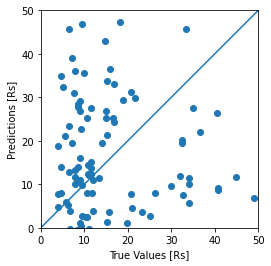

In [0]:
import matplotlib.pyplot as plt

test_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(train_label, test_predictions)
plt.xlabel('True Values [Rs]')
plt.ylabel('Predictions [Rs]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

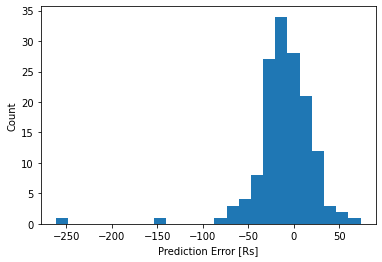

In [0]:
error = test_predictions - train_label
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Rs]")
_ = plt.ylabel("Count")